# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Notebooks/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

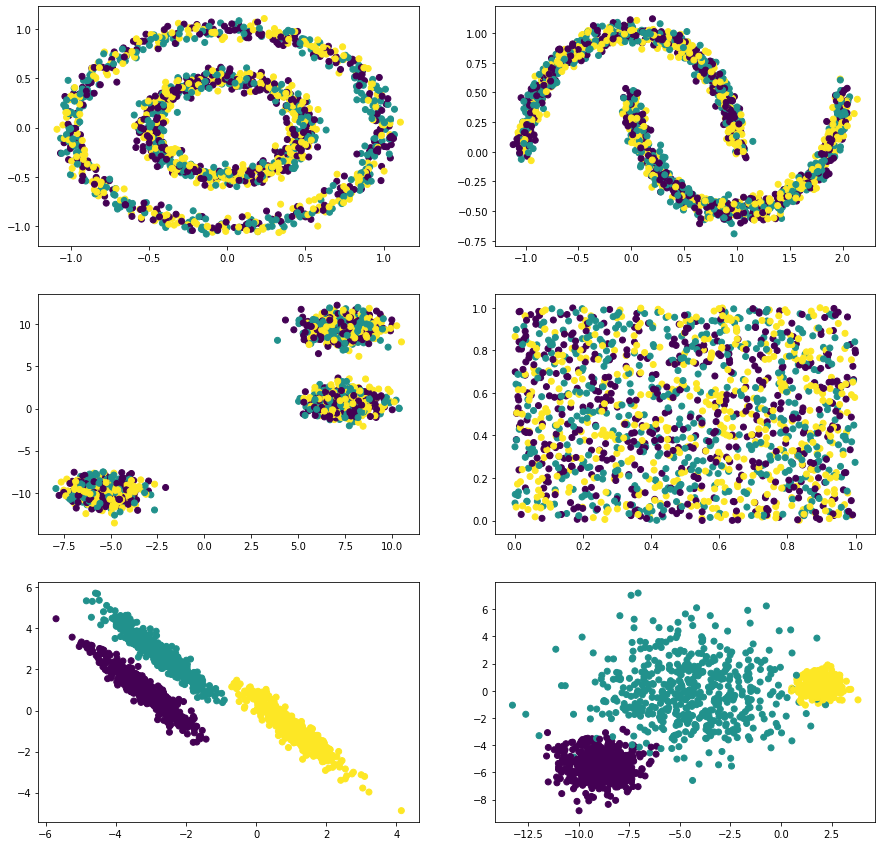

In [34]:
fig, ax = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)

ax[0,0].scatter(A[:,0], A[:,1],c=y)
ax[0,1].scatter(B[:,0], B[:,1],c=y)
ax[1,0].scatter(C[:,0], C[:,1],c=y)
ax[1,1].scatter(D[:,0], D[:,1],c=y)
ax[2,0].scatter(E[:,0], E[:,1],c=y)
ax[2,1].scatter(F[:,0], F[:,1],c=y)

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

In [49]:
from sklearn.cluster import KMeans

kmeansA = KMeans(n_clusters=2, init='k-means++').fit_predict(A)
kmeansB = KMeans(n_clusters=2, init='k-means++').fit_predict(B)
kmeansC = KMeans(n_clusters=3, init='k-means++').fit_predict(C)
kmeansD = KMeans(n_clusters=3, init='k-means++').fit_predict(D)
kmeansE = KMeans(n_clusters=3, init='k-means++').fit_predict(E)
kmeansF = KMeans(n_clusters=3, init='k-means++').fit_predict(F)

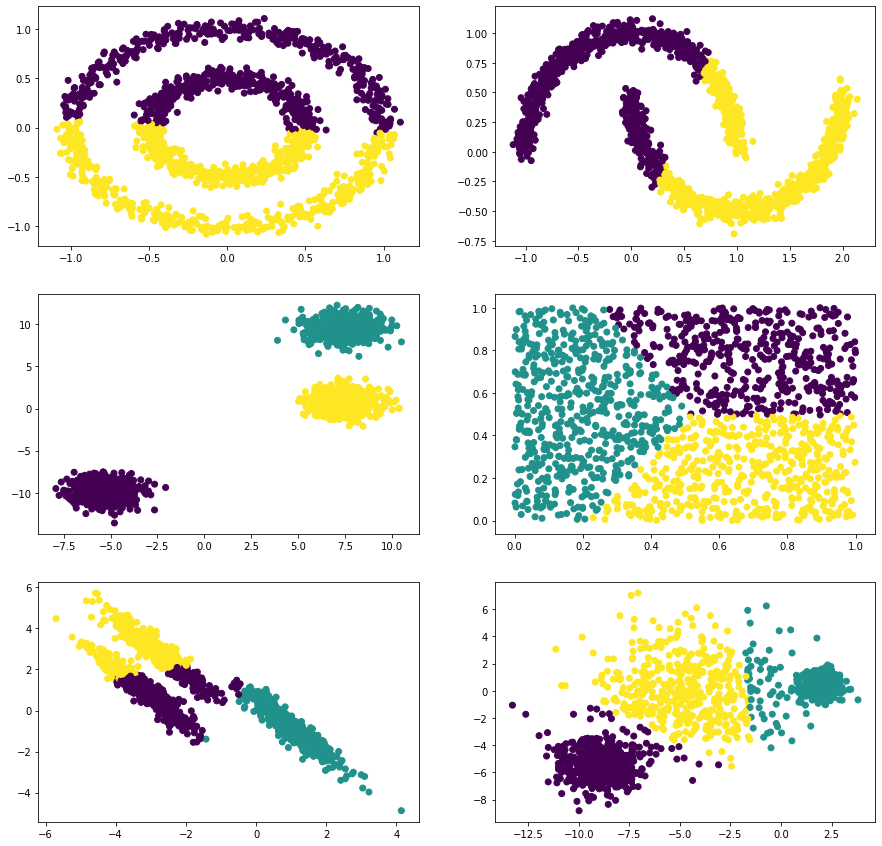

In [50]:
fig, ax = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)

ax[0,0].scatter(A[:,0], A[:,1],c=kmeansA)
ax[0,1].scatter(B[:,0], B[:,1],c=kmeansB)
ax[1,0].scatter(C[:,0], C[:,1],c=kmeansC)
ax[1,1].scatter(D[:,0], D[:,1],c=kmeansD)
ax[2,0].scatter(E[:,0], E[:,1],c=kmeansE)
ax[2,1].scatter(F[:,0], F[:,1],c=kmeansF)

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

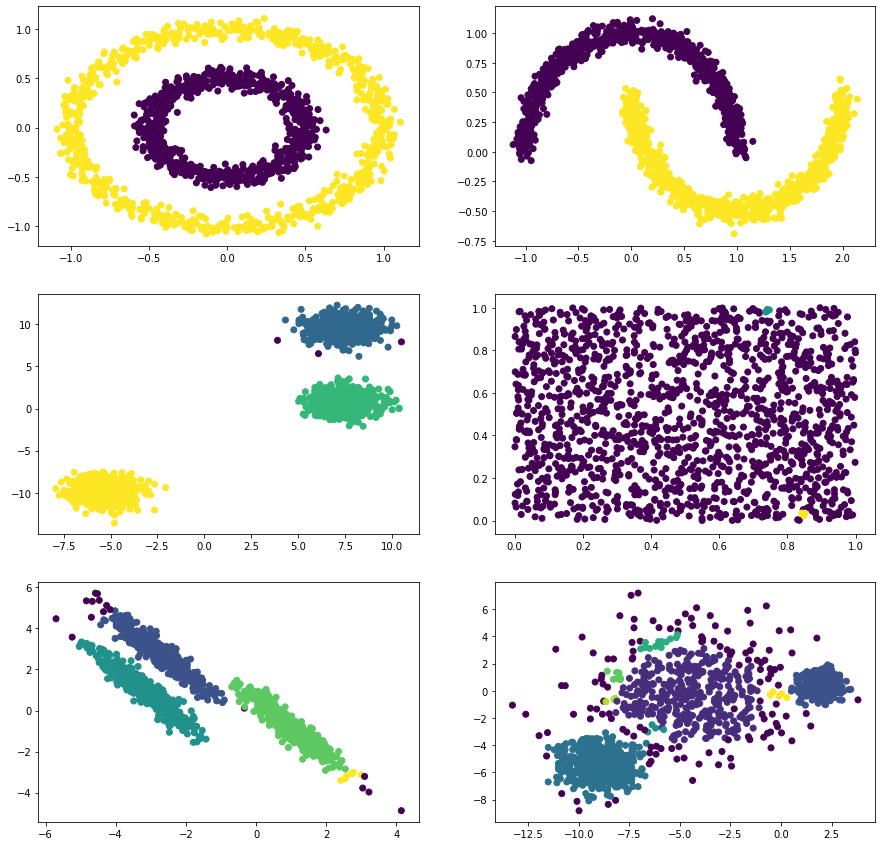

In [66]:
from sklearn.cluster import DBSCAN

dbA = DBSCAN(eps=0.2).fit_predict(A)
dbB = DBSCAN(eps=0.2).fit_predict(B)
dbC = DBSCAN(eps=1).fit_predict(C)
dbD = DBSCAN(eps=0.01).fit_predict(D)
dbE = DBSCAN(eps=0.3).fit_predict(E)
dbF = DBSCAN(eps=0.5).fit_predict(F)

fig, ax = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)

ax[0,0].scatter(A[:,0], A[:,1],c=dbA)
ax[0,1].scatter(B[:,0], B[:,1],c=dbB)
ax[1,0].scatter(C[:,0], C[:,1],c=dbC)
ax[1,1].scatter(D[:,0], D[:,1],c=dbD)
ax[2,0].scatter(E[:,0], E[:,1],c=dbE)
ax[2,1].scatter(F[:,0], F[:,1],c=dbF)